# Разбиение множества на равные части

## Импорт модулей

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Входные данные

Для начала инициализируем начальное множество из 34 чисел:

[3380, 1824, 1481, 2060, 1225, 836, 1363, 2705, 4635,
648, 2588, 3380, 1952, 3832, 3176, 2316, 2479, 3433,
3519, 1363, 1824, 3305, 2156, 3305, 3049, 3980, 2787,
4635, 4068, 2992, 5932, 528, 3304, 4107]

In [ ]:
U = np.array([3380, 1824, 1481, 2060, 1225, 836, 1363, 2705, 4635,
              648, 2588, 3380, 1952, 3832, 3176, 2316,
              2479, 3433, 3519, 1363, 1824, 3305, 2156, 3305,
              3049, 3980, 2787, 4635, 4068, 2992, 5932, 528,
              3304, 4107], dtype='int16')

l = U.size # Количесвто элементов
q = 10 # Количесвто подмножеств
Q = 100 # Количество особей (разбиений, то есть partitions)
total = U.sum()
ideal = U.sum()/q # Идеальная сумма в подмножствах

print(f'Количество элементов в исходном множестве: {l}')
print(f'Количество подмножеств: {q}')
print(f'Количество особей: {Q}')
print(f'Сумма всех чисел в массиве: {total}')
print(f'Идеальная сумма чисел в подмножестве: {ideal}')

Количество элементов в исходном множестве: 34
Количество подмножеств: 10
Количество особей: 100
Сумма всех чисел в массиве: 94167
Идеальная сумма чисел в подмножестве: 9416.7


## Вспомагательные функции

### Функции генерирующие разбиения

Теперь определим фнкцию, которая гененрирует разбиения (возвращает двумерный булевый массив) и функцию, которая конвертирует разбиение из двумерного булевого массива в человеческий вид.

In [ ]:
def get_bool_partition(U, q, l):
  '''Документация'''
  indexes = np.random.randint(0,q,size=U.size) # Каждое число указывает к какому подмножеству оно записывается
  bool_partition = []
  for subset in np.arange(q):
    bool_partition.append(indexes == subset)
  return np.array(bool_partition)

In [ ]:
def get_real_partirion(U, bool_partition):
  '''Документация'''
  real_partition = []
  for bool_subset in bool_partition:
    real_partition.append(U[bool_subset])
  return real_partition

In [ ]:
bool_partition = get_bool_partition(U, q, l)
real_partition = get_real_partirion(U, bool_partition)
real_partition

[array([1225,  648, 3832, 1824, 3305, 4635], dtype=int16),
 array([4635], dtype=int16),
 array([528], dtype=int16),
 array([2060, 1363, 3305], dtype=int16),
 array([3380, 2992], dtype=int16),
 array([1824, 2588, 3049, 3980], dtype=int16),
 array([1363, 1952, 3433, 2156, 4068, 3304, 4107], dtype=int16),
 array([3380, 2479, 2787], dtype=int16),
 array([2316, 3519, 5932], dtype=int16),
 array([1481,  836, 2705, 3176], dtype=int16)]

### Функции генерирующие популяцию

Создаём функцию, которая будет генерировать популяцию:

In [ ]:
def create_bool_population(Q,U,q,l):
  return [get_bool_partition(U,q,l) for i in range(Q)]

In [ ]:
def create_real_population(bool_population):
  real_population = []
  for bool_partition in bool_population:
    real_population.append(get_real_partirion(U, bool_partition))
  return real_population

In [ ]:
bool_population = create_bool_population(Q,U,q,l)

In [ ]:
real_population = create_real_population(bool_population)
real_population[0]

[array([1363, 3980], dtype=int16),
 array([1363,  648, 3433, 1824, 4635, 2992,  528, 4107], dtype=int16),
 array([1824, 2705], dtype=int16),
 array([2060, 2588], dtype=int16),
 array([1952, 2316], dtype=int16),
 array([4635, 3380], dtype=int16),
 array([3380, 3832, 3176, 2787], dtype=int16),
 array([2156, 5932], dtype=int16),
 array([1481, 2479, 3519, 3305, 3049, 4068], dtype=int16),
 array([1225,  836, 3305, 3304], dtype=int16)]

Необходимо связать два представления популяции перед сортировкой:

In [ ]:
def create_union_population(real_population, bool_population, Q):
  '''Данная фукнция создаёт общее представлние популяции'''
  union_population = []
  for i in range(Q):
    union_population.append(list(zip(real_population[i], list(bool_population[i]))))
  return union_population

In [ ]:
union_population = create_union_population(real_population, bool_population, Q)
union_population[0]

[(array([1363, 3980], dtype=int16),
  array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False])),
 (array([1363,  648, 3433, 1824, 4635, 2992,  528, 4107], dtype=int16),
  array([False, False, False, False, False, False,  True, False, False,
          True, False, False, False, False, False, False, False,  True,
         False, False,  True, False, False, False, False, False, False,
          True, False,  True, False,  True, False,  True])),
 (array([1824, 2705], dtype=int16),
  array([False,  True, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False])),
 (array([2060, 2588], dty

### Функции, отвечающие за ошибки

Теперь определим функцию, которая будет вычислять ошибку подмножества, и функцию, которая будет вычислять ошибку разбиения

In [ ]:
def get_error_subset(subset, ideal):
  '''Вычисляет ошибку подмножества: Возвращает абсолютную разницу между суммой подмножества и идеальной суммой'''
  return np.abs(subset.sum()-ideal)

In [ ]:
def get_error_partition(real_partition, ideal):
  '''Вычисляет ошибку разбиения: Возвращает сумму евклидовых расстояний между суммой подмножеств и идеальной суммой'''
  return np.sqrt(np.sum(np.array(list(map(lambda real_part: ((real_part.sum()-ideal)**2), real_partition)))))

In [ ]:
get_error_partition(real_partition, ideal)

16940.009684176686

### Функции, упордчивающие подмножества

Опишем функцию, которая будет упорядочивать подмножества по ошибкам:

In [ ]:
def sort_subsets_in_partition(union_population, ideal):
  '''Данная функция упорядочивает подмножества в разбиении по ошибке'''
  union_population.sort(key=lambda views: get_error_subset(views[0], ideal))
  return union_population

In [ ]:
union_partition = sort_subsets_in_partition(union_population[0], ideal)
union_partition

[(array([1225,  836, 3305, 3304], dtype=int16),
  array([False, False, False, False,  True,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False,  True, False])),
 (array([2156, 5932], dtype=int16),
  array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True, False, False, False, False,
         False, False, False,  True, False, False, False])),
 (array([4635, 3380], dtype=int16),
  array([False, False, False, False, False, False, False, False,  True,
         False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False])),
 (array([3380, 3832, 3176, 2787], dtype=int16),
 

Проверка:

In [ ]:
list(map(lambda union_subset: get_error_subset(union_subset[0], ideal), union_partition))

[746.7000000000007,
 1328.7000000000007,
 1401.7000000000007,
 3758.2999999999993,
 4073.7000000000007,
 4768.700000000001,
 4887.700000000001,
 5148.700000000001,
 8484.3,
 10113.3]

Также определим функцию, которая будет упорядочивать подмножества во всех разбиениях, то есть во всей популяции

In [ ]:
def sort_subsets_in_population(union_population, ideal, Q):
  '''Данная функция сортирует подмножества во всей популяции (оба представления)
  Возвращает оба представления популяции, но упорядоченные'''
  new_union_population = []
  for i in range(Q):
    new_union_population.append(sort_subsets_in_partition(union_population[i], ideal))

  # Разбиваем общее представление популяции на булевую и на реальную
  real_population = []
  bool_population = []
  for union_partition in union_population:
    real_partition = []
    bool_partition = []
    for union_subset in union_partition:
      real_partition.append(union_subset[0])
      bool_partition.append(union_subset[1])
    real_population.append(real_partition)
    bool_population.append(bool_partition)
  return (real_population, bool_population)

In [ ]:
real_population, bool_population = sort_subsets_in_population(union_population, ideal, Q)

Проверка. Убеждаемся, что два представления соответствуют друг другу:

In [ ]:
real_population[0]

[array([1225,  836, 3305, 3304], dtype=int16),
 array([2156, 5932], dtype=int16),
 array([4635, 3380], dtype=int16),
 array([3380, 3832, 3176, 2787], dtype=int16),
 array([1363, 3980], dtype=int16),
 array([2060, 2588], dtype=int16),
 array([1824, 2705], dtype=int16),
 array([1952, 2316], dtype=int16),
 array([1481, 2479, 3519, 3305, 3049, 4068], dtype=int16),
 array([1363,  648, 3433, 1824, 4635, 2992,  528, 4107], dtype=int16)]

In [ ]:
bool_population[0]

[array([False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False,  True, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False,  True, False, False, False]),
 array([False, False, False, False, False, False, False, False,  True,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False,

Проверка. Убеждаеся, что подмножества в популяции упорядочились

In [ ]:
list(map(lambda subset: get_error_subset(subset, ideal), real_population[0]))

[746.7000000000007,
 1328.7000000000007,
 1401.7000000000007,
 3758.2999999999993,
 4073.7000000000007,
 4768.700000000001,
 4887.700000000001,
 5148.700000000001,
 8484.3,
 10113.3]

### Функция приспособленности

Теперь определим функцию приспособленности:

In [ ]:
def fitness(real_population, bool_population, ideal):
  '''Данная функция вычисляет приспособленность каждого индивида в Популяции'''
  errors_partitions = np.array(list(map(lambda real_partition: get_error_partition(real_partition, ideal), real_population))) # Ошибки разбиения
  LOW = min(errors_partitions) # Эта штука не нужна (я не правильно понял текст, там речь идёт про то, что теперь диапазон приспособленности от 1 до HIGH - LOW + 1)
  HIGH = max(errors_partitions)
  data = pd.DataFrame({
    'Особь реальная' : real_population,
    'Особь булевая': bool_population,
    'Приспособленность': HIGH + 1 - errors_partitions
  })
  data = data.sort_values(by='Приспособленность', ascending=False) # Упростить: сделать сортировку сразу же при создании df
  data.index = np.arange(0,len(data))
  return data

In [ ]:
data = fitness(real_population, bool_population, ideal)
data

,Особь реальная,Особь булевая,Приспособленность
0,"[[2588, 3519, 3980], [3380, 1824, 648, 2479], ...","[[False, False, False, False, False, False, Fa...",16559.773749
1,"[[1363, 3433, 4635], [836, 3380, 1824, 3305], ...","[[False, False, False, False, False, False, Tr...",15748.291967
2,"[[1481, 4635, 2479, 528], [1225, 3176, 2316, 3...","[[False, False, True, False, False, False, Fal...",15723.783377
3,"[[1363, 2156, 2992, 3304], [1952, 3832, 4068],...","[[False, False, False, False, False, False, Fa...",15382.692277
4,"[[3380, 2316, 3305], [2479, 1824, 3980, 528], ...","[[False, False, False, False, False, False, Fa...",14983.595114
...,...,...,...
95,"[[1952, 3519, 3305, 4068], [3380, 3433, 3049, ...","[[False, False, False, False, False, False, Fa...",1501.792654
96,"[[3380, 3176, 3980], [2316, 2479, 3049], [1225...","[[True, False, False, False, False, False, Fal...",1081.234769
97,"[[1824, 836, 2588, 4107], [2060, 3832, 3433], ...","[[False, True, False, False, False, True, Fals...",736.155462
98,"[[2060, 3380, 4107], [1363, 2588, 1363, 3049],...","[[False, False, False, True, False, False, Fal...",109.286996


### Функция отбора

Теперь опишем функцию, которая отвечает за отбор:

1.   7% наиболее приспособленных особей автоматически доживает до следующего поколения - элитарность;
2.   индивиды отбираются для родительства с вероятностью, равной их относительной пригодности (fitness) в популяции; мы используем стандартное взвешенное колесо рулетки.

In [ ]:
def selection(data, proc=0.07, Q = Q):
  '''
     data = DataFrame со столбцами особь + пригодность;
     proc = процент особей автоматически выживающих, и переходящих в следующее поколение;
     Q = количество особей
     Возвращает: df с особями, которые автматически доживают до следующего поколения и df родителей
  '''

  # 1. Отбор
  # 1.1 Элитарные особи не участвуют в отборе и автоматически проходят его
  q_survival = np.int(np.around(Q*0.07)) # Количесвто элитарных особей
  selected = data[0:q_survival:1] # Автоматически проходят отбор
  for_selected = data[q_survival::1] # Таблица с участниками отбора

  # 1.2 Стадия отбора для остальных
  # 1.2.1 Подсчёт характеристик для рулетки
  for_selected['Вероятность'] = for_selected['Приспособленность'].values/for_selected['Приспособленность'].sum() # Вероятности
  for_selected['Нижняя граница'] = np.array([for_selected['Вероятность'][0:i].sum() for i in range(0,len(for_selected))]) # Нижняя граница
  for_selected['Верхняя граница'] = np.array([for_selected['Вероятность'][0:i].sum() for i in range(1,len(for_selected)+1)]) # Верхняя граница

  # 1.2.2 Рулетка пошла
  while len(selected)<67:
    r = np.random.uniform(0,1) # Рандомное число
    temp_individ = for_selected[(for_selected['Нижняя граница']<r) & (for_selected['Верхняя граница']>r)][['Особь реальная', 'Особь булевая', 'Приспособленность']]
    for_selected = for_selected[(for_selected['Нижняя граница']<r) & (for_selected['Верхняя граница']<r) | (for_selected['Нижняя граница']>r) & (for_selected['Верхняя граница']>r)]
    selected = selected.append(temp_individ) # Добавляем особь, которая выиграла в рулетке, в датафрейм отобранных особей

  selected.index = np.arange(67) # Всего 67 отобрано должно быть (мы здесь упорядочиваем индексы, так как они нужны именно в этом виде)

  return selected

In [ ]:
select_individs = selection(data)

<ipython-input-750-17180d125845>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  q_survival = np.int(np.around(Q*0.07)) # Количесвто элитарных особей
<ipython-input-750-17180d125845>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_selected['Вероятность'] = for_selected['Приспособленность'].values/fo

In [ ]:
len(select_individs['Приспособленность'].unique())

67

In [ ]:
select_individs

,Особь реальная,Особь булевая,Приспособленность
0,"[[2588, 3519, 3980], [3380, 1824, 648, 2479], ...","[[False, False, False, False, False, False, Fa...",16559.773749
1,"[[1363, 3433, 4635], [836, 3380, 1824, 3305], ...","[[False, False, False, False, False, False, Tr...",15748.291967
2,"[[1481, 4635, 2479, 528], [1225, 3176, 2316, 3...","[[False, False, True, False, False, False, Fal...",15723.783377
3,"[[1363, 2156, 2992, 3304], [1952, 3832, 4068],...","[[False, False, False, False, False, False, Fa...",15382.692277
4,"[[3380, 2316, 3305], [2479, 1824, 3980, 528], ...","[[False, False, False, False, False, False, Fa...",14983.595114
...,...,...,...
62,"[[3380, 2588, 4068], [1225, 2479, 4107], [1363...","[[True, False, False, False, False, False, Fal...",11466.607946
63,"[[1363, 4635, 4068], [1824, 648, 1952, 2479, 1...","[[False, False, False, False, False, False, Fa...",7248.694888
64,"[[836, 3433, 1363, 528, 3304], [4635, 4068], [...","[[False, False, False, False, False, True, Fal...",3434.203623
65,"[[3380, 1824, 1481, 3176], [4635, 2588, 2787],...","[[True, True, True, False, False, False, False...",7344.089563


### Функция скрещивания

Опишем функцию, которая будет реализовывать операцию скрещивания:

In [ ]:
def crossover(select_individs):

  ts = pd.DataFrame({'Особь реальная': [], 'Особь булевая': []})
  temp = [] # Кароче тут просто магия я написал, но сам не понял как это работает
  for k in range(len(select_individs)): # Перебор детей
    bool_individ = np.array(select_individs.iloc[k]['Особь булевая'])
    temp.append(bool_individ)
  ts['Особь булевая'] = temp
  ts['Особь реальная'] = select_individs['Особь реальная'].copy()

  children = pd.DataFrame({'Особь реальная': [], 'Особь булевая': []}) # Датафрейм таблица, в ней будут храниться дети
  childs_real = [] # Реальный список детей
  childs_bool = [] # Булевый список детей

  # Этап 1. Сборка малышей
  for i in range(33):  # Всего 33 ребёнка
  # 1.1. Проверка, что родители разные
    while 1:
      id_parrent_1 = np.random.randint(0,67)
      id_parrent_2 = np.random.randint(0,67)
      if id_parrent_1 != id_parrent_2:
        break
    # 1.2. Сборка малышей
    child_real = [] # Реальный ребёнок
    child_bool = [] # Булевый ребёнок
    for i in range(len(ts.iloc[id_parrent_1]['Особь реальная'])): # Перебираем подмножества
      if get_error_subset(ts.iloc[id_parrent_1]['Особь реальная'][i], ideal) < get_error_subset(ts.iloc[id_parrent_2]['Особь реальная'][i], ideal):
        child_real.append(ts.iloc[id_parrent_1]['Особь реальная'][i])
        child_bool.append(ts.iloc[id_parrent_1]['Особь булевая'][i])
      else:
        child_real.append(ts.iloc[id_parrent_2]['Особь реальная'][i])
        child_bool.append(ts.iloc[id_parrent_2]['Особь булевая'][i])

    # Добавляем ребёнка в список детей (булевый и реальный)
    childs_real.append(child_real)
    childs_bool.append(child_bool)

  # Вставляем детей детей в таблицу
  children['Особь реальная'] = childs_real
  children['Особь булевая'] = childs_bool

  # Этап 2. Восстановление подмножеств детей
  # 2.1. Если одно и тоже число принадлежит сразу двум подмножествам ребёнка, то удаляем его из подмножества с наименьшей ошибкой
  for k in range(len(children)): # Перебор детей
    child = children.iloc[k] # Вытаскиваем k-го ребёнка всего их 33
    for i in range(len(child['Особь булевая'])): # Перебираем все его подмножества (их 10 штук)
      for j in range(i+1,len(child['Особь булевая'])): # Поочерёдно берём остальные подмножества
        if 2 in (np.int8(child['Особь булевая'][i]) + np.int8(child['Особь булевая'][j])): # Проверяем не содержится ли одно и то же число в двух подмножествах ребёнка одновременно
          array_pos = np.argwhere((np.int8(child['Особь булевая'][i]) + np.int8(child['Особь булевая'][j]))==2) # Находим индекс повторяющегося элемента в подмножествах

          # Проверка из какого подмножества необходимо удалять повторяющийся элемент
          for pos in array_pos:
            if get_error_subset(child['Особь реальная'][i], ideal) > get_error_subset(child['Особь реальная'][j], ideal): # Удаляем повторяющее число из подмножества с наибольшей ошибкой
              child['Особь булевая'][i][pos] = False
            else:
              child['Особь булевая'][j][pos] = False

  children['Особь реальная'] = create_real_population(list(children['Особь булевая'])) # Также мы конвертируем новую булевую популяцию в реальную

  # 2.2. Если какое-либо число не вошло ни в одно подмножество ребёнка
  temp = [] # Кароче тут просто магия я написал, но сам не понял как это работает
  for k in range(len(children)): # Перебор детей
    bool_child = np.array(children.iloc[k]['Особь булевая'])
    temp.append(bool_child)
  children['Особь булевая'] = temp

  for k in range(len(children)): # Перебор детей
    child = children.iloc[k] # Вытаскиваем k-го ребёнка всего их 33
    indexes = np.argwhere(np.int8(np.array(child['Особь булевая'])).sum(axis=0)==0).reshape(-1)
    digits = U[indexes]
    id_and_dig = np.vstack((indexes, digits)).T # Пропущенное число + индекс этого числа в U
    id_and_dig = id_and_dig[id_and_dig[:, 1]. argsort ()][::-1] # Сортируем пропущенные числа по возрастанию с привязкой к индексу
    id_and_subset = [[i, child['Особь реальная'][i]] for i in range(len(child['Особь реальная']))] # Список элементы которого id + подмножество ребёнка
    for i in range(len(id_and_dig)): # Пробегаем по всем числам
      id_min_subset = min(id_and_subset, key=lambda el: el[1].sum())[0] # Идентификатор подмножества с наибольшей суммой
      id_and_subset[id_min_subset] = [id_min_subset, np.append(id_and_subset[id_min_subset][1], id_and_dig[i][1])] # Добавляем наибольшее число в подмножество с наименьшей суммой
      child['Особь реальная'][id_min_subset] =  np.append(child['Особь реальная'][id_min_subset], id_and_dig[i][1])
      child['Особь булевая'][id_min_subset][id_and_dig[i,0]] = True

  children['Приспособленность'] = [0 for i in range(len(children))] # Присваиваем детям 0 приспособленности

  data = pd.concat([children, select_individs]) # Объединяем детей и родителей
  data = fitness(data['Особь реальная'], data['Особь булевая'], ideal)

  return data

In [ ]:
data = crossover(select_individs)
data

,Особь реальная,Особь булевая,Приспособленность
0,"[[2705, 3380, 3305], [1481, 3176, 3049, 1363],...","[[False, False, False, False, False, False, Fa...",22943.069047
1,"[[2705, 3380, 3305], [1481, 3176, 3049, 1363],...","[[False, False, False, False, False, False, Fa...",22943.069047
2,"[[2705, 3380, 3305], [2156, 5932, 1952], [4635...","[[False, False, False, False, False, False, Fa...",21579.882660
3,"[[3519, 1824, 4068], [4635, 2588, 2787], [836,...","[[False, False, False, False, False, False, Fa...",21480.008716
4,"[[2588, 3433, 3519], [836, 1363, 3176, 2479, 2...","[[False, False, False, False, False, False, Fa...",20818.105971
...,...,...,...
95,"[[2588, 3433, 3519], [2705, 1363, 4107], [4635...","[[False, False, False, False, False, False, Fa...",3800.042612
96,"[[836, 2588, 3832, 2156], [2060, 1225, 1952, 3...","[[False, False, False, False, False, True, Fal...",3471.832667
97,"[[3519, 1824, 4068], [3380, 836, 1363, 3049], ...","[[False, False, False, False, False, False, Fa...",3315.283157
98,"[[836, 3433, 1363, 528, 3304], [4635, 4068], [...","[[False, False, False, False, False, True, Fal...",1933.410969


Как можно видеть выше, после операции скрещивания размер популяции снова имеет начальный размер.

Тест (проверка на то, что гены ребёнка были восстановлены):

In [ ]:
for i in range(len(data['Особь булевая'])):
  temp = np.int8(np.array(data['Особь булевая'][i])).sum(axis=0)
  if len(np.argwhere(temp>1))!=0:
    print('Тест завален!')
    print(f'В {i}-ом ребёнке')

In [ ]:
for i in range(len(data['Особь булевая'])):
  temp = np.int8(np.array(data['Особь булевая'][i])).sum(axis=0)
  print(temp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1

### Мутация

Также как и показано в файле, определяем функцию, которая реализует мутацию генетиечского алгоритма.

In [ ]:
def mutation(data):

  # Параметры для мутации:
  start_groups = [0,7,40,70]
  end_groups = [7,40,70,100] # Длина групп
  p = [0.1, 0.5, 0.5, 0.5] # Вероятность мутации в каждой группе
  q_mutation = [1,4,10,20] # Количество мутаций в каждой группе
  for j in range(len(start_groups)): # Перебираем группы
    for i in range(start_groups[j], end_groups[j]): # Изымаем каждый элемент из группы
      for q in range(end_groups[j]): # Каждый элемент может подвергаться нескольким мутациями
        if np.random.uniform()<p[j]:
          id_bool_subset1 = np.random.randint(0,10)
          id_bool_subset2 = np.random.randint(0,10)
          ind1 = np.argwhere(data.iloc[i]['Особь булевая'][id_bool_subset1]==True).reshape(-1)
          ind2 = np.argwhere(data.iloc[i]['Особь булевая'][id_bool_subset2]==False).reshape(-1)
          if len(np.intersect1d(ind1, ind2))!=0:
            data.iloc[i]['Особь булевая'][id_bool_subset1][np.intersect1d(ind1, ind2)[0]] = False
            data.iloc[i]['Особь булевая'][id_bool_subset2][np.intersect1d(ind1, ind2)[0]] = True
  temp = [] # Кароче тут просто магия я написал, но сам не понял как это работает
  for k in range(len(data)): # Перебор детей
    bool_individ = list(data.iloc[k]['Особь булевая'])
    temp.append(bool_individ)
  data['Особь булевая'] = temp
  data = fitness(data['Особь реальная'], data['Особь булевая'], ideal) # Вычисляем приспособленность

  return data

In [ ]:
data = mutation(data)

Тест (в ходе мутации гены особей не пострадали):

In [ ]:
for i in range(len(data['Особь булевая'])):
  temp = np.int8(np.array(data['Особь булевая'][i])).sum(axis=0)
  print(temp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1

## Сборка

После того как были запрограммированы все компоненты генетического алгоритма, настало время собрать его и применить. Для начала определим исходные данные:

In [ ]:
U = np.array([3380, 1824, 1481, 2060, 1225, 836, 1363, 2705, 4635,
              648, 2588, 3380, 1952, 3832, 3176, 2316,
              2479, 3433, 3519, 1363, 1824, 3305, 2156, 3305,
              3049, 3980, 2787, 4635, 4068, 2992, 5932, 528,
              3304, 4107], dtype='int16')

l = U.size # Количесвто элементов
q = 10 # Количесвто подмножеств
Q = 100 # Количество особей (разбиений, то есть partitions)
total = U.sum()
ideal = U.sum()/q # Идеальная сумма в подмножствах

print(f'Количество элементов в исходном множестве: {l}')
print(f'Количество подмножеств: {q}')
print(f'Количество особей: {Q}')
print(f'Сумма всех чисел в массиве: {total}')
print(f'Идеальная сумма чисел в подмножестве: {ideal}')

Количество элементов в исходном множестве: 34
Количество подмножеств: 10
Количество особей: 100
Сумма всех чисел в массиве: 94167
Идеальная сумма чисел в подмножестве: 9416.7


Ниже приведена функция Генетического алгоритма, которая ищет наилучшее разбиение множества на подмножества с наиболее одинаковой суммой:

In [ ]:
def GA(eps = 500, times = 5):

  res = {'Статус': 'С таким eps не нашлось'}

  bool_population = create_bool_population(Q,U,q,l) # Генерируем булевую популяцию
  real_population = create_real_population(bool_population) # Генерируем реальную популяцию
  union_population = create_union_population(real_population, bool_population, Q) # Создаём общую популяцию (два представления)
  real_population, bool_population = sort_subsets_in_population(union_population, ideal, Q) # Упорядочиваем подмножества у всех индивидов
  data = fitness(real_population, bool_population, ideal) # Создаём таблицу, где каждому индвиду задаём приспособленность

  for time in range(times):
    select_individs = selection(data) # Отбор
    data = crossover(select_individs) # Скрещивание
    data = mutation(data)
    lst_error_partition = list(map(lambda i: (i, get_error_partition(data['Особь реальная'][i], ideal)), range(len(data['Особь реальная']))))
    info_min_partition = min(lst_error_partition, key=lambda el: el[1])
    print(info_min_partition)
    if info_min_partition[1]<eps:
      res = {
          'Разбиение с наименьшей ошибкой': data['Особь реальная'][info_min_partition[0]],
          'Ошибка разбиения': info_min_partition[1],
          'Номер популяции': time
          }
      break

  return res

In [ ]:
res = GA(eps = 500, times = 100)

Как можно видеть ниже, генетический алгоритм отработал и нашёл следующее решение (Решение было найдено на 52+1 итерации, ошибка разбиения составляет около 399 квадратных единиц, так как использовалось Евклидово расстояние):

In [ ]:
res

{'Разбиение с наименьшей ошибкой': [array([3305, 2787,  528, 2705]),
  array([5932, 2992,  648]),
  array([4635, 3380, 1363]),
  array([4635, 3305, 1481]),
  array([1225, 3832, 2156, 2316]),
  array([3049, 4107, 2479]),
  array([4068, 3380, 1824]),
  array([3176, 3519, 2588]),
  array([ 836, 3980, 3304, 1363]),
  array([2060, 1824, 3433, 1952])],
 'Ошибка разбиения': 399.16675713290556,
 'Номер популяции': 52}

Также проиллюстрируем полученный результат графиком, на котором видно,  суммы подмножеств получились очень близкими между собой и близкими к идеальному значению:

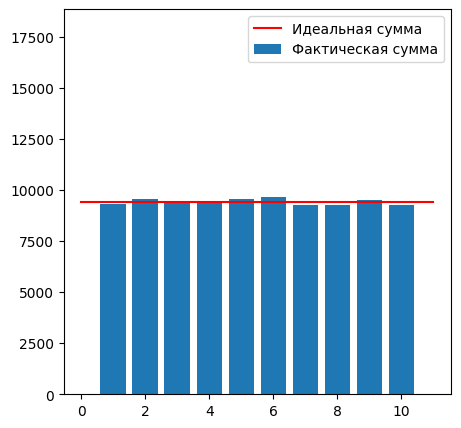

In [ ]:
x = [0,11]
y = [ideal, ideal]
x_for_bar = [i for i in range(1,11)]
y_for_bar = [real_partition.sum() for real_partition in res['Разбиение с наименьшей ошибкой']]

f = plt.figure(figsize=(5,5))
ax = f.add_subplot()
ax.set_ylim([0, ideal*2])
ax.plot(x,y, c='#FF0000', label='Идеальная сумма')
ax.bar(x_for_bar, y_for_bar, label='Фактическая сумма')
ax.legend()